In [1]:
import pandas as pd

from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My Drive/Google colab Save/kaggle/0.doc_for_me

Mounted at /content/drive
/content/drive/My Drive/Google colab Save/kaggle/0.doc_for_me


In [3]:
pip install shap

     |████████████████████████████████| 358kB 6.0MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489402 sha256=ef8e3f15da036206462976a849bdd565ac76e9215daada38d4eac66d7728dd59
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/hos_train.csv')
y = data.readmitted
base_features = ['number_inpatient', 'num_medications', 'number_diagnoses', 'num_lab_procedures', 
                 'num_procedures', 'time_in_hospital', 'number_outpatient', 'number_emergency', 
                 'gender_Female', 'payer_code_?', 'medical_specialty_?', 'diag_1_428', 'diag_1_414', 
                 'diabetesMed_Yes', 'A1Cresult_None']

# Some versions of shap package error when mixing bools and numerics
X = data[base_features].astype(float)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# For speed, we will calculate shap values on smaller subset of the validation data
small_val_X = val_X.iloc[:150]
my_model = RandomForestClassifier(n_estimators=30, random_state=1).fit(train_X, train_y)

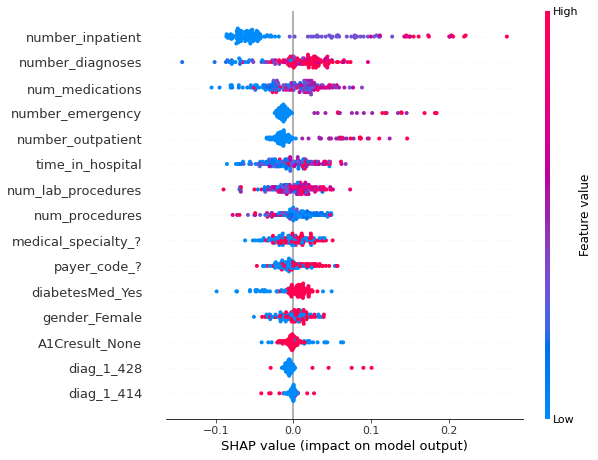

In [5]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(small_val_X)

shap.summary_plot(shap_values[1], small_val_X)

- 분포가 균일한테 색깔이 명확하게 구분되면
  - permutation importance 가 큰 것으로 예상된다
- diag변수의 경우에....
  - 병을 가진 사람의 수는 적기때문에...
  - 빨간색의 수는 적지만..
  - 확연하게 구분이 된다.


## 상관관계 확인
- 첫번째 파라미터 : 관심있는 대상
- 인터랙션 : 또 다른 관심 (설정 안하면 알아서 찾음)

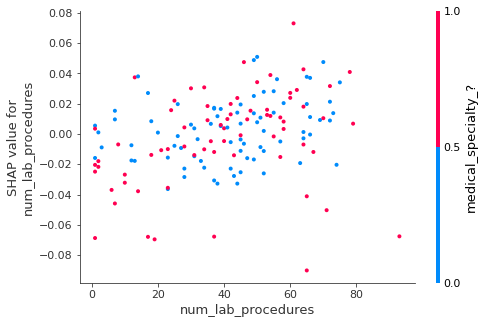

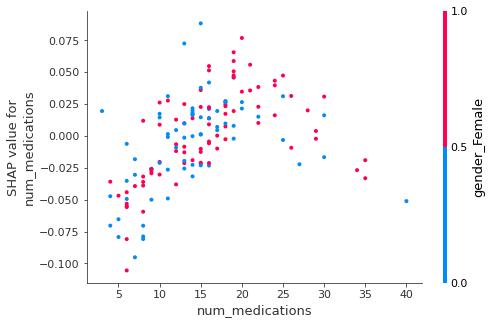

In [11]:
shap.dependence_plot('num_lab_procedures', shap_values[1], small_val_X)
# shap.dependence_plot('num_lab_procedures', shap_values[1], small_val_X,interaction_index="Goal Scored")
shap.dependence_plot('num_medications', shap_values[1], small_val_X)